## Evaluate ranking metrics before

Running AVGSEQ with the best config for GRU (iconic-plasma-1262)

ngc batch run --name "tranf4rec-htune-v06-avgseq" --preempt RUNONCE --ace nv-us-west-2 --instance dgx1v.32g.2.norm --commandline "nvidia-smi && wandb login 76eea90114bb1cdcbafe151b262e4a5d4ff60f12 && date && git pull origin experimentation && date && bash script/run_transformer_v2.bash htune-v06-avgseq full_noneg session_cooccurrence --start_date 2019-10-01 --end_date 2019-10-15 --model_type avgseq --loss_type cross_entropy --per_device_eval_batch_size 128 --similarity_type concat_mlp --tf_out_activation tanh --all_rescale_factor 1.0 --neg_rescale_factor 0.0 --inp_merge mlp --learning_rate_warmup_steps 0 --learning_rate_num_cosine_cycles 4.0 --dataloader_drop_last --compute_metrics_each_n_steps 50 --max_seq_len 20 --num_train_epochs 10 --per_device_train_batch_size 256 --learning_rate 0.0002024939202283675 --learning_rate_schedule  constant_with_warmup --dropout 0.2 --weight_decay 9.065312473196671e-05 --d_model 320 --n_layer 1 --log_predictions --log_attention_weights && date" --result /results --image "nvidian/prj-recsys/transf4rec_exp:0.1.0" --org nvidian --team prj-recsys --datasetid 66609:/data


Id: 1516822

wandb: Syncing run dazzling-wind-1352
wandb: 🚀 View run at https://app.wandb.ai/gspmoreira/huggingface/runs/1dvpu74e


AOD_all_Test_ndcg@1000_all
0.2424

In [1]:
import os
import pandas as pd
import seaborn as sns

In [2]:
BASE_PATH = '1516822/pred_logs/'

In [3]:
preds_df = pd.read_parquet(os.path.join(BASE_PATH, 'preds_date_2019-10-15.parquet'))
len(preds_df)

12393

In [4]:
preds_df.columns

Index(['metadata_seq_pos', 'metadata_sess_bid_seq', 'metadata_sess_ccid_seq',
       'metadata_sess_csid_seq', 'metadata_sess_pid_seq',
       'metadata_sess_product_recency_seq', 'metric_all_avg_precision@10',
       'metric_all_avg_precision@100', 'metric_all_avg_precision@1000',
       'metric_all_avg_precision@5', 'metric_all_ndcg@10',
       'metric_all_ndcg@100', 'metric_all_ndcg@1000', 'metric_all_ndcg@5',
       'metric_all_precision@10', 'metric_all_precision@100',
       'metric_all_precision@1000', 'metric_all_precision@5',
       'metric_all_recall@10', 'metric_all_recall@100',
       'metric_all_recall@1000', 'metric_all_recall@5'],
      dtype='object')

In [5]:
preds_df

,metadata_seq_pos,metadata_sess_bid_seq,metadata_sess_ccid_seq,metadata_sess_csid_seq,metadata_sess_pid_seq,metadata_sess_product_recency_seq,metric_all_avg_precision@10,metric_all_avg_precision@100,metric_all_avg_precision@1000,metric_all_avg_precision@5,...,metric_all_ndcg@1000,metric_all_ndcg@5,metric_all_precision@10,metric_all_precision@100,metric_all_precision@1000,metric_all_precision@5,metric_all_recall@10,metric_all_recall@100,metric_all_recall@1000,metric_all_recall@5
0,[2],[20],[131],[15],[8499],[-0.60625505],1.000,1.000000,1.000000,1.0,...,1.000000,1.0,0.1,0.01,0.001,0.2,1.0,1.0,1.0,1.0
1,[3],[4305],[131],[15],[44928],[-0.8575405],0.000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0
2,[4],[65],[131],[15],[21205],[-0.61365515],0.000,0.000000,0.006289,0.0,...,0.136576,0.0,0.0,0.00,0.001,0.0,0.0,0.0,1.0,0.0
3,[2],[36],[7],[18],[1905],[-0.596494],0.000,0.022222,0.022222,0.0,...,0.181043,0.0,0.0,0.01,0.001,0.0,0.0,1.0,1.0,0.0
4,[3],[541],[131],[152],[43672],[-0.6356059],0.000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12388,[4],[7],[10],[7],[1595],[-0.6025502],0.125,0.125000,0.125000,0.0,...,0.315465,0.0,0.1,0.01,0.001,0.0,1.0,1.0,1.0,0.0
12389,[5],[31],[10],[7],[796],[-0.603478],0.000,0.031250,0.031250,0.0,...,0.198240,0.0,0.0,0.01,0.001,0.0,0.0,1.0,1.0,0.0
12390,[6],[2],[10],[7],[2128],[-0.60158366],0.000,0.018868,0.018868,0.0,...,0.173765,0.0,0.0,0.01,0.001,0.0,0.0,1.0,1.0,0.0
12391,[7],[31],[10],[7],[3524],[-0.6067032],0.000,0.011364,0.011364,0.0,...,0.154423,0.0,0.0,0.01,0.001,0.0,0.0,1.0,1.0,0.0


In [6]:
COLS_TO_SQUEEZE = ['metadata_sess_pid_seq', 'metadata_seq_pos']

for col in COLS_TO_SQUEEZE:
    print (col)
    preds_df[col] = preds_df[col].apply(lambda x: x[0])

metadata_sess_pid_seq
metadata_seq_pos


## Analyzing metrics

In [7]:
metrics_Cols = ['metric_all_ndcg@1000', 'metric_all_avg_precision@1000', 'metric_all_recall@1000']

In [8]:
preds_df[metrics_Cols].mean()

metric_all_ndcg@1000             0.249542
metric_all_avg_precision@1000    0.130538
metric_all_recall@1000           0.823933
dtype: float64

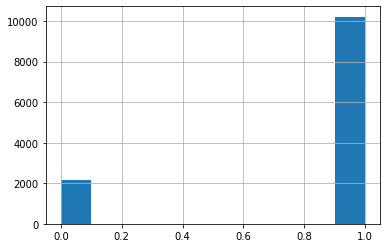

In [9]:
preds_df['metric_all_recall@1000'].hist()

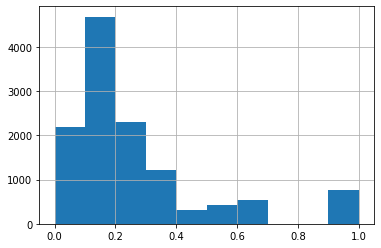

In [10]:
preds_df['metric_all_ndcg@1000'].hist()

In [11]:
preds_df.groupby('metric_all_ndcg@1000').size().sort_values(ascending=False)

metric_all_ndcg@1000
0.000000    2182
1.000000     758
0.630930     533
0.500000     415
0.430677     315
            ... 
0.105533       1
0.105510       1
0.113213       1
0.113295       1
0.120164       1
Length: 795, dtype: int64

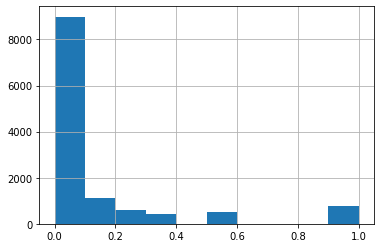

In [12]:
preds_df['metric_all_avg_precision@1000'].hist()

## Computing categ features popularity

In [13]:
days = []
for day in range(2,15):
    days.append(pd.read_parquet(os.path.join(BASE_PATH, 'preds_date_2019-10-{:02}.parquet'.format(day))))
    
preds_full_df = pd.concat(days)

for col in COLS_TO_SQUEEZE:
    print (col)
    preds_full_df[col] = preds_full_df[col].apply(lambda x: x[0])

metadata_sess_pid_seq
metadata_seq_pos


In [14]:
pid_pop_df = preds_full_df.groupby('metadata_sess_pid_seq').size().to_frame('pid_count').reset_index()
pid_pop_df

,metadata_sess_pid_seq,pid_count
0,2,631
1,3,737
2,4,658
3,5,286
4,6,404
...,...,...
36998,203157,1
36999,203331,1
37000,203333,1
37001,203899,1


## Computing stats on models accuracy

In [15]:
preds_df = preds_df.merge(pid_pop_df, how='left')

In [16]:
preds_df.head(5)

,metadata_seq_pos,metadata_sess_bid_seq,metadata_sess_ccid_seq,metadata_sess_csid_seq,metadata_sess_pid_seq,metadata_sess_product_recency_seq,metric_all_avg_precision@10,metric_all_avg_precision@100,metric_all_avg_precision@1000,metric_all_avg_precision@5,...,metric_all_ndcg@5,metric_all_precision@10,metric_all_precision@100,metric_all_precision@1000,metric_all_precision@5,metric_all_recall@10,metric_all_recall@100,metric_all_recall@1000,metric_all_recall@5,pid_count
0,2,[20],[131],[15],8499,[-0.60625505],1.0,1.000000,1.000000,1.0,...,1.0,0.1,0.01,0.001,0.2,1.0,1.0,1.0,1.0,2.0
1,3,[4305],[131],[15],44928,[-0.8575405],0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,NaN
2,4,[65],[131],[15],21205,[-0.61365515],0.0,0.000000,0.006289,0.0,...,0.0,0.0,0.00,0.001,0.0,0.0,0.0,1.0,0.0,NaN
3,2,[36],[7],[18],1905,[-0.596494],0.0,0.022222,0.022222,0.0,...,0.0,0.0,0.01,0.001,0.0,0.0,1.0,1.0,0.0,16.0
4,3,[541],[131],[152],43672,[-0.6356059],0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,NaN


### Analyzing correlation between accuracy and label metadata stats

In [17]:
preds_df['ndcg@1000_bin'] = pd.cut(preds_df['metric_all_ndcg@1000'], 4)

In [18]:
preds_df.groupby('ndcg@1000_bin').size()

ndcg@1000_bin
(-0.001, 0.25]    8413
(0.25, 0.5]       2689
(0.5, 0.75]        533
(0.75, 1.0]        758
dtype: int64

In [19]:
preds_df.groupby('ndcg@1000_bin')[['metadata_seq_pos',
                                   'pid_count']].agg(['mean', 'median'])

metadata_seq_pos          pid_count       
                           mean median        mean median
ndcg@1000_bin                                            
(-0.001, 0.25]         5.764412      4   50.769321   10.0
(0.25, 0.5]            4.215694      3   97.244796   25.0
(0.5, 0.75]            3.626642      3  121.384170   37.0
(0.75, 1.0]            3.464380      3  138.871099   41.0

In [20]:
preds_df[['metric_all_ndcg@1000', 'metadata_seq_pos', 'pid_count']] \
     .corr(method='spearman')['metric_all_ndcg@1000']

metric_all_ndcg@1000    1.000000
metadata_seq_pos       -0.214261
pid_count               0.343586
Name: metric_all_ndcg@1000, dtype: float64

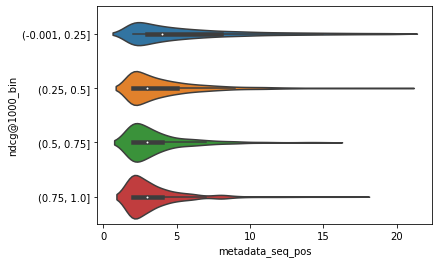

In [21]:
ax = sns.violinplot(x='metadata_seq_pos', y='ndcg@1000_bin', data=preds_df)

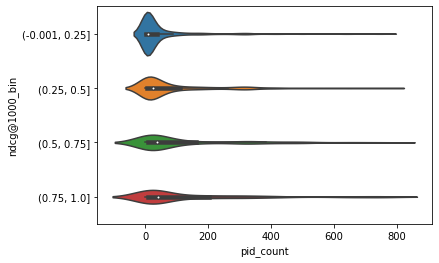

In [22]:
ax = sns.violinplot(x='pid_count', y='ndcg@1000_bin', data=preds_df)

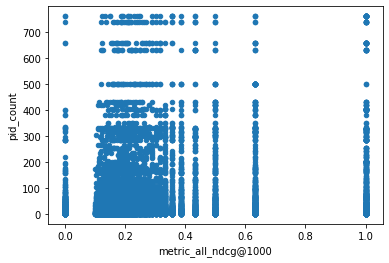

In [23]:
preds_df.plot.scatter(y='pid_count', x='metric_all_ndcg@1000')

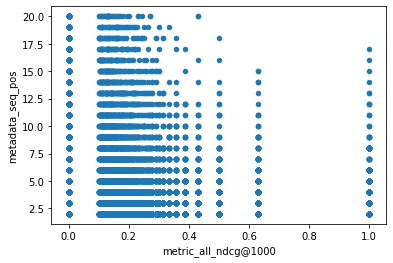

In [24]:
preds_df.plot.scatter(y='metadata_seq_pos', x='metric_all_ndcg@1000')